In [14]:
# If not already installed, do: pip install pandas fastparquet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

URL_DATA = 'https://storage.data.gov.my/publicsafety/crime_district.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

df.head()

,state,district,category,type,date,crimes
0,Malaysia,All,assault,all,2016-01-01,22327
1,Malaysia,All,assault,all,2017-01-01,21366
2,Malaysia,All,assault,all,2018-01-01,16902
3,Malaysia,All,assault,all,2019-01-01,16489
4,Malaysia,All,assault,all,2020-01-01,13279


In [10]:
df.describe(include='all')

,state,district,category,type,date,crimes
count,19152,19152,19152,19152,19152,19152.000000
unique,15,160,2,13,NaN,NaN
top,Sarawak,All,assault,all,NaN,NaN
freq,3248,1680,10944,2736,NaN,NaN
mean,NaN,NaN,NaN,NaN,2019-07-02 18:00:00,189.728018
min,NaN,NaN,NaN,NaN,2016-01-01 00:00:00,0.000000
25%,NaN,NaN,NaN,NaN,2017-10-01 18:00:00,1.000000
50%,NaN,NaN,NaN,NaN,2019-07-02 12:00:00,12.000000
75%,NaN,NaN,NaN,NaN,2021-04-02 06:00:00,66.000000
max,NaN,NaN,NaN,NaN,2023-01-01 00:00:00,90028.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19152 entries, 0 to 19151
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   state     19152 non-null  object        
 1   district  19152 non-null  object        
 2   category  19152 non-null  object        
 3   type      19152 non-null  object        
 4   date      19152 non-null  datetime64[ns]
 5   crimes    19152 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 897.9+ KB


In [19]:
df.category.value_counts(normalize=True)

category
assault     0.571429
property    0.428571
Name: proportion, dtype: float64

<Axes: ylabel='category'>

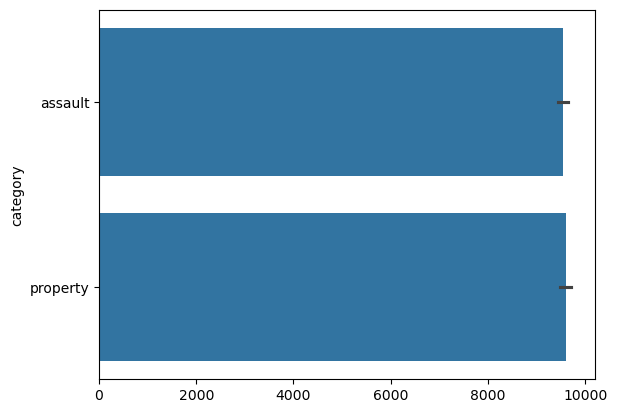

In [17]:
sns.barplot(df.category)

In [64]:
states = df.state.unique()
states = list(states)
states = states[1:]
states

['Johor',
 'Kedah',
 'Kelantan',
 'Melaka',
 'Negeri Sembilan',
 'Pahang',
 'Perak',
 'Perlis',
 'Pulau Pinang',
 'Sabah',
 'Sarawak',
 'Selangor',
 'Terengganu',
 'W.P. Kuala Lumpur']

In [58]:
State = df.groupby('state')

In [76]:
results = State.crimes[State.state != 'Malaysia'].sum()
results

IndexError: Column(s) crimes already selected

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Johor'),
  Text(1, 0, 'Kedah'),
  Text(2, 0, 'Kelantan'),
  Text(3, 0, 'Malaysia'),
  Text(4, 0, 'Melaka'),
  Text(5, 0, 'Negeri Sembilan'),
  Text(6, 0, 'Pahang'),
  Text(7, 0, 'Perak'),
  Text(8, 0, 'Perlis'),
  Text(9, 0, 'Pulau Pinang'),
  Text(10, 0, 'Sabah'),
  Text(11, 0, 'Sarawak'),
  Text(12, 0, 'Selangor'),
  Text(13, 0, 'Terengganu'),
  Text(14, 0, 'W.P. Kuala Lumpur')])

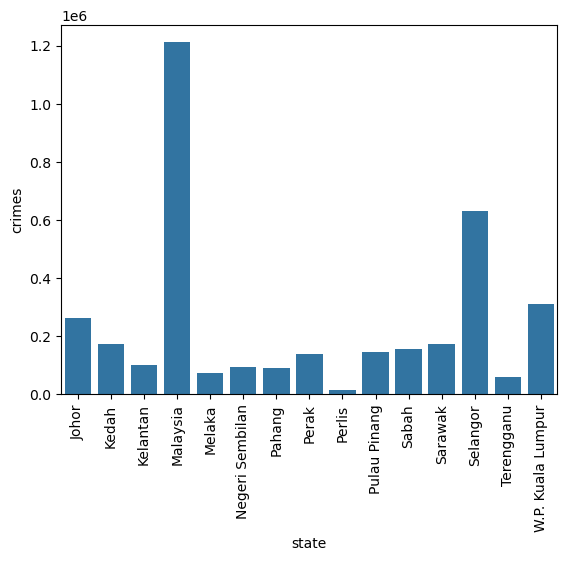

In [74]:
ax = plt.subplot
sns.barplot(results)
plt.xticks(rotation = 90)

In [54]:
import random

def simulate_coin_tosses(num_tosses):
    heads = 0
    tails = 0
    
    for _ in range(num_tosses):
        if random.choice(['Heads', 'Tails']) == 'Heads':
            heads += 1
        else:
            tails += 1
            
    return heads, tails

# Number of tosses
num_tosses = 10
heads, tails = simulate_coin_tosses(num_tosses)

# Calculate probabilities
probability_heads = heads / num_tosses
probability_tails = tails / num_tosses

print(f"Number of Heads: {heads}")
print(f"Number of Tails: {tails}")
print(f"Probability of Heads: {probability_heads:.2f}")
print(f"Probability of Tails: {probability_tails:.2f}")


Number of Heads: 3
Number of Tails: 7
Probability of Heads: 0.30
Probability of Tails: 0.70
